In [3]:
import json
import os
import random
import pandas as pd
import matplotlib.pyplot as plt
import requests
from scipy.stats import linregress
from pprint import pprint
from secrets import api_key

In [4]:
injury_data_path= "injury_data.csv"
injury_data=pd.read_csv(injury_data_path)

injury_data.head()

,Unnamed: 0,Player ID,Season,Season Type,Week,Name,Team,Position,Body Part,Declared Inactive
0,0,6048,2012,1,1,Early Doucet,ARI,WR,--,False
1,1,6353,2012,1,1,Adam Snyder,ARI,G,Elbow,False
2,2,9319,2012,1,1,LaRod Stephens-Howling,ARI,RB,Groin,False
3,3,9323,2012,1,1,Chris Wells,ARI,RB,Hamstring,False
4,4,9782,2012,1,1,Gregory Toler,ARI,CB,Hip,False


In [5]:
injury_data['Body Part'] = injury_data['Body Part'].replace(
    {'Concussion, ankle': 'Concussion', 'Concussion, eye': 'Concussion', 'Concussion, hip': 'Concussion', 'Concussion, illness': 'Concussion',\
    'Concussion, stinger': 'Concussion', 'Concussion, elbow': 'Concussion', 'Concussion, knee, ankle': 'Concussion','Concussion, hamstring': 'Concussion',\
    'Concussion, finger': 'Concussion', 'Concussion, chest': 'Concussion', 'Concussion, left shoulder': 'Concussion',\
    'Concussion, toe': 'Concussion', 'Concussion, foot, thigh': 'Concussion', 'Concussion, shoulder': 'Concussion',\
    'Concussion, groin': 'Concussion','Concussion, not injury related': 'Concussion', 'Concussion, neck': 'Concussion',\
    'Concusison': 'Concussion', 'Head': 'Concussion'})

In [8]:
concussion_df = injury_data.loc[(injury_data['Body Part'] == 'Concussion')]
concussion_df

,Unnamed: 0,Player ID,Season,Season Type,Week,Name,Team,Position,Body Part,Declared Inactive
15,15,8638,2012,1,1,Sean Considine,BAL,S,Concussion,False
33,33,12607,2012,1,1,Lorenzo Booker,CHI,RB,Concussion,False
44,44,9956,2012,1,1,Dan Skuta,CIN,LB,Concussion,False
75,75,8853,2012,1,1,Gerald Sensabaugh,DAL,DB,Concussion,False
89,89,14201,2012,1,1,Bill Bentley,DET,DB,Concussion,False
...,...,...,...,...,...,...,...,...,...,...
55417,55417,20971,2020,1,7,Andrew Van Ginkel,MIA,OLB,Concussion,False
55439,55439,16851,2020,1,7,Carl Davis Jr.,NE,DT,Concussion,True
55457,55457,17457,2020,1,7,Nick Easton,NO,OL,Concussion,True
55473,55473,19200,2020,1,7,C.J. Board,NYG,WR,Concussion,True


In [65]:
per_season= concussion_df.groupby(["Season"]).count()
per_season


,Unnamed: 0,Player ID,Season Type,Week,Name,Team,Position,Body Part,Declared Inactive
Season,,,,,,,,,
2012,380,380,380,380,380,380,380,380,380
2013,288,288,288,288,288,288,288,288,288
2014,229,229,229,229,229,229,229,229,130
2015,330,330,330,330,330,330,330,330,48
2016,461,461,461,461,461,461,461,461,82
2017,486,486,486,486,486,486,486,486,486
2018,358,358,358,358,358,358,358,358,358
2019,417,417,417,417,417,417,417,417,417
2020,43,43,43,43,43,43,43,43,43


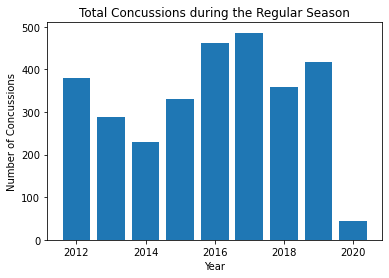

<Figure size 432x288 with 0 Axes>

In [28]:
x= [2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020]

y= per_season["Body Part"]

plt.bar(x,y)
plt.title("Total Concussions during the Regular Season")
plt.xlabel("Year")
plt.ylabel("Number of Concussions")
plt.show()
plt.savefig("totalconcussionsseasons")

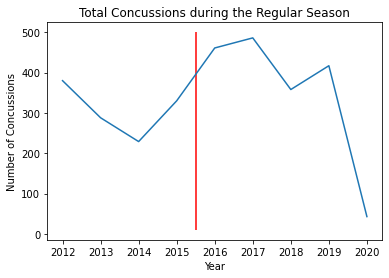

<Figure size 432x288 with 0 Axes>

In [39]:
x= [2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020]

y= per_season["Body Part"]

plt.plot(x,y)
plt.title("Total Concussions during the Regular Season")
plt.xlabel("Year")
plt.ylabel("Number of Concussions")
plt.vlines(2015.5, 500, 10, alpha= 1, color= "red")
plt.show()
plt.savefig("totalconcussionsseasonsline")

In [67]:
mean_concussions= per_season.mean()["Body Part"]
mean


332.44444444444446

In [68]:
before_movie=per_season[["Body Part"]].iloc[[0,1,2,3]].mean()
before_movie

Body Part    306.75
dtype: float64

In [69]:
after_movie=per_season[["Body Part"]].iloc[[4,5,6,7]].mean()
after_movie

Body Part    430.5
dtype: float64

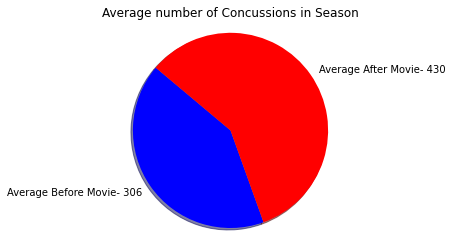

<Figure size 432x288 with 0 Axes>

In [77]:
labels=["Average Before Movie- 306", "Average After Movie- 430"]
count=[306.75, 430.5]
colors=["blue", "red"]
explode=(.5, 0)

plt.pie(count, labels=labels, colors=colors, shadow= True, startangle=140)
plt.title("Average number of Concussions in Season")
plt.axis("equal")
plt.show()
plt.savefig("averageperseason")